<img src="images/Picture0.png" width=200x />

# Notebook 05 - Data Sandbox

## Instructions
...

## Pre-requisites
...

## Credits
...


## If you are using Colab, save a copy of this notebook!!

Before we get started, it is crucially important that you **save a copy of the notebook** to a local folder if you are accessing this notebook in Google Colab! Please go to:

```
File -> Make a copy
```


# Data Sandbox

In this module we give you, effectively, free reign to apply the techniques you have learned and the tools you have acquired to the task of performing exploratory data analysis, elementary inference, and model diagnostics on a dataset of your choosing (among a collection of possibilities which we provide).


**NOTE: could update some of these datasets, but for now just using old ones**




In [1]:
import os
import sys
import pandas as pd
import numpy as np

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.discriminant_analysis as da
# feel free to import whatever else you need

Here are the datasets:

Concrete strength dataset - https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

Wine quality dataset - https://archive.ics.uci.edu/ml/datasets/wine+quality

Heart failure dataset - https://www.kaggle.com/fedesoriano/heart-failure-prediction

Health insurance dataset - https://www.kaggle.com/mirichoi0218/insurance

Sklearn dataset for diabetes

from sklearn.datasets import load_diabetes diabetes = load_diabetes(as_frame=True) print(list(diabetes))

Sklearn dataset for cancer

from sklearn import datasets cancer = datasets.load_breast_cancer()

Description at https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

Wisconsin breast cancer dataset - https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

E-coli dataset - https://archive.ics.uci.edu/ml/datasets/ecoli https://www.kaggle.com/datasets/kannanaikkal/ecoli-uci-dataset

Indian liver patient dataset - https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)

For those datasets which are not directly included in sklearn you will have to download the dataset from the link, convert it to a .csv (which can be done using "Save As" in either Excel or Numbers) saved in your working directory, and load it into Python using pd.read_csv('data.csv'), where data.csv is the file in your working directory (where you saved your copy of this notebook).

If you have trouble loading in your dataset, be sure to ask a TA or colleague for assistance.

Go exploring! Below you will find an outline for your analysis, but do not feel limited by this scaffold.

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


## Exploratory Data Analysis

- What variables are available in your dataset? What type are they?
- What is the distribution of some of the variables?
- Are there any relationships between two variables?
- What question might you be able to answer with this data and a model type you have learned so far?



In [234]:
import os
import sys
import pandas as pd
import numpy as np
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [235]:
wine_red = pd.read_csv(r"Documents\GitHub\Workshop-02\wine+quality\winequality-red.csv",sep = ';')
wine_white = pd.read_csv(r"Documents\GitHub\Workshop-02\wine+quality\winequality-white.csv",sep = ';')

In [236]:
wine_red['type of wine'] = 'red'
wine_white['type of wine'] = 'white'
wine = pd.concat([wine_red, wine_white], axis=0)

In [237]:
wine.columns = wine.columns.str.replace(' ', '_')
wine_white.columns = wine_white.columns.str.replace(' ', '_')
wine_red.columns = wine_red.columns.str.replace(' ', '_')

In [238]:
display(wine.columns)

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type_of_wine'],
      dtype='object')

In [239]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


<AxesSubplot: xlabel='type_of_wine', ylabel='quality'>

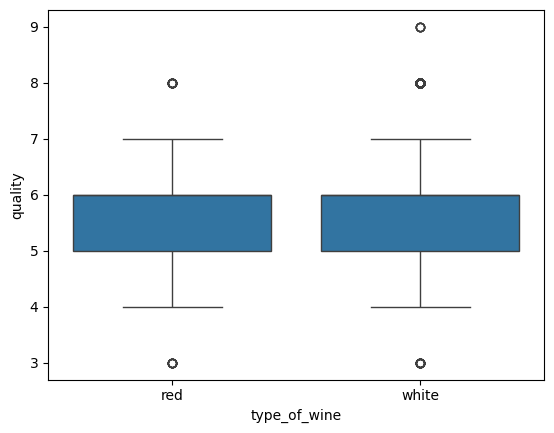

In [240]:
sns.boxplot(data = wine,
            x="type_of_wine",
            y="quality")
#sns.pairplot(data); ## this will take awhile

## Model Building

- Build a regression/logistic regression model to answer your question of interest.
- Evaluate the model fit.
- Be sure to check any relevant conditions.

In [247]:
model = smf.ols('quality ~ (fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol)*type_of_wine', data = wine)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     125.6
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:32:32   Log-Likelihood:                -7138.8
No. Observations:                6497   AIC:                         1.433e+04
Df Residuals:                    6473   BIC:                         1.449e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     21.9652     23.790      0.923      0.356     -24.672      68.602
type_of_wine[T.white]                        128.2276     29.956      4.280      0.000      69.504     186.952
fixed_acidity                                  0.0250      0.029      0.858      0.391      -0.032       0.082
fixed_acidity:type_of_wine[T.white]            0.0405      0.035      1.143      0.253      -0.029       0.110
volatile_acidity                              -1.0836      0.136     -7.971      0.000      -1.350      -0.817
volatile_acidity:type_of_wine[T.white]        -0.7796      0.175     -4.456      0.000      -1.123      -0.437
citric_acid                                   -0.1826      0.165     -1.105      0.269      -0.506       0.141
citric_acid:type_of_wine[T.white]              0.2047      0.189      1.080      0.280      -0.167       0.576
residual_sugar                                 0.0163      0.017      0.970      0.332      -0.017       0.049
residual_sugar:type_of_wine[T.white]           0.0652      0.018      3.551      0.000       0.029       0.101
chlorides                                     -1.8742      0.471     -3.982      0.000      -2.797      -0.952
chlorides:type_of_wine[T.white]                1.6269      0.708      2.298      0.022       0.239       3.015
free_sulfur_dioxide                            0.0044      0.002      1.789      0.074      -0.000       0.009
free_sulfur_dioxide:type_of_wine[T.white]     -0.0006      0.003     -0.245      0.807      -0.006       0.004
total_sulfur_dioxide                          -0.0033      0.001     -3.991      0.000      -0.005      -0.002
total_sulfur_dioxide:type_of_wine[T.white]     0.0030      0.001      3.324      0.001       0.001       0.005
density                                      -17.8812     24.283     -0.736      0.462     -65.483      29.721
density:type_of_wine[T.white]               -132.4030     30.506     -4.340      0.000    -192.205     -72.601
pH                                            -0.4137      0.215     -1.923      0.054      -0.835       0.008
pH:type_of_wine[T.white]                       1.1000      0.238      4.621      0.000       0.633       1.567
sulphates                                      0.9163      0.128      7.140      0.000       0.665       1.168
sulphates:type_of_wine[T.white]               -0.2849      0.161     -1.769      0.077      -0.600       0.031
alcohol                                        0.2762      0.030      9.291      0.000       0.218       0.334
alcohol:type_of_wine[T.white]                 -0.0827      0.038     -2.185      0.029      -0.157      -0.008
==============================================================================
Omnibus

## remove fixed_acidity citric_acid

In [242]:
model = smf.ols('quality ~ (volatile_acidity+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol)*type_of_wine', data = wine)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     151.2
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:27:24   Log-Likelihood:                -7145.0
No. Observations:                6497   AIC:                         1.433e+04
Df Residuals:                    6477   BIC:                         1.447e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     12.0575     13.489      0.894      0.371     -14.385      38.500
type_of_wine[T.white]                         95.2347     18.574      5.127      0.000      58.824     131.645
volatile_acidity                              -1.0128      0.113     -8.934      0.000      -1.235      -0.791
volatile_acidity:type_of_wine[T.white]        -0.8963      0.156     -5.729      0.000      -1.203      -0.590
residual_sugar                                 0.0115      0.015      0.761      0.447      -0.018       0.041
residual_sugar:type_of_wine[T.white]           0.0534      0.016      3.335      0.001       0.022       0.085
chlorides                                     -2.0491      0.448     -4.570      0.000      -2.928      -1.170
chlorides:type_of_wine[T.white]                1.5380      0.686      2.241      0.025       0.192       2.883
free_sulfur_dioxide                            0.0049      0.002      2.029      0.042       0.000       0.010
free_sulfur_dioxide:type_of_wine[T.white]     -0.0011      0.003     -0.443      0.658      -0.006       0.004
total_sulfur_dioxide                          -0.0036      0.001     -4.579      0.000      -0.005      -0.002
total_sulfur_dioxide:type_of_wine[T.white]     0.0032      0.001      3.770      0.000       0.002       0.005
density                                       -7.5668     13.327     -0.568      0.570     -33.693      18.559
density:type_of_wine[T.white]                -98.7086     18.478     -5.342      0.000    -134.931     -62.486
pH                                            -0.4920      0.136     -3.617      0.000      -0.759      -0.225
pH:type_of_wine[T.white]                       0.9472      0.155      6.112      0.000       0.643       1.251
sulphates                                      0.9024      0.127      7.112      0.000       0.654       1.151
sulphates:type_of_wine[T.white]               -0.3254      0.159     -2.047      0.041      -0.637      -0.014
alcohol                                        0.2810      0.023     12.385      0.000       0.237       0.325
alcohol:type_of_wine[T.white]                 -0.0390      0.029     -1.340      0.180      -0.096       0.018
==============================================================================
Omnibus:                      139.982   Durbin-Watson:                   1.644
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.635
Skew:                           0.039   Prob(JB):                     1.58e-67
Kurtosis:                       4.063   Cond. No.                     6.22e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance m

elementary inference \
residual sugar,density affected a lot for white wine \
free_sulfur_dioxide affected red wine

# Colinearity

In [248]:
summary = []
for item  in wine.columns[:-1]:
    resonpond = []
    for xs in wine.columns[:-1]:
        if xs!= item:
            resonpond.append(xs)
    formula = item + '~' + "+".join(resonpond)
    model = smf.ols(formula, data = wine)
    fitted = model.fit()
    rq = float(fitted.summary().tables[0].data[0][3])
    vif =  1/(1-rq **2)
    summary.append((item,vif > 5))
    

In [249]:
summary

[('fixed_acidity', False),
 ('volatile_acidity', False),
 ('citric_acid', False),
 ('residual_sugar', False),
 ('chlorides', False),
 ('free_sulfur_dioxide', False),
 ('total_sulfur_dioxide', False),
 ('density', True),
 ('pH', False),
 ('sulphates', False),
 ('alcohol', False),
 ('quality', False)]

In [250]:
model = smf.ols('density ~ (quality+volatile_acidity+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+pH+sulphates+alcohol)', data = wine)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                density   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     2991.
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:34:48   Log-Likelihood:                 33851.
No. Observations:                6497   AIC:                        -6.768e+04
Df Residuals:                    6487   BIC:                        -6.761e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.9985      0.000   2444.301      0.000       0.998       0.999
quality               -4.46e-05   2.23e-05     -2.001      0.045   -8.83e-05   -9.03e-07
volatile_acidity         0.0030      0.000     24.430      0.000       0.003       0.003
residual_sugar           0.0004   4.26e-06     87.066      0.000       0.000       0.000
chlorides                0.0079      0.001     13.740      0.000       0.007       0.009
free_sulfur_dioxide  -4.854e-06   1.35e-06     -3.582      0.000   -7.51e-06    -2.2e-06
total_sulfur_dioxide -1.054e-05   4.76e-07    -22.155      0.000   -1.15e-05    -9.6e-06
pH                       0.0017      0.000     15.278      0.000       0.001       0.002
sulphates                0.0044      0.000     34.990      0.000       0.004       0.005
alcohol                 -0.0013   1.76e-05    -72.555      0.000      -0.001      -0.001
==============================================================================
Omnibus:                     2420.646   Durbin-Watson:                   1.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43577.924
Skew:                           1.315   Prob(JB):                         0.00
Kurtosis:                      15.412   Cond. No.                     4.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [251]:
model = smf.ols('quality ~ (fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+pH+sulphates+alcohol)*type_of_wine', data = wine)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     133.1
Date:                Sun, 05 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:34:48   Log-Likelihood:                -7172.1
No. Observations:                6497   AIC:                         1.439e+04
Df Residuals:                    6475   BIC:                         1.454e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                      4.4538      0.691      6.444      0.000       3.099       5.809
type_of_wine[T.white]                         -2.3902      0.769     -3.109      0.002      -3.897      -0.883
fixed_acidity                                  0.0081      0.018      0.450      0.653      -0.027       0.044
fixed_acidity:type_of_wine[T.white]           -0.0585      0.023     -2.525      0.012      -0.104      -0.013
volatile_acidity                              -1.0964      0.135     -8.093      0.000      -1.362      -0.831
volatile_acidity:type_of_wine[T.white]        -0.8619      0.175     -4.937      0.000      -1.204      -0.520
citric_acid                                   -0.1836      0.166     -1.106      0.269      -0.509       0.142
citric_acid:type_of_wine[T.white]              0.1547      0.190      0.813      0.416      -0.218       0.528
residual_sugar                                 0.0090      0.014      0.658      0.510      -0.018       0.036
residual_sugar:type_of_wine[T.white]           0.0167      0.014      1.208      0.227      -0.010       0.044
chlorides                                     -1.9067      0.471     -4.049      0.000      -2.830      -0.984
chlorides:type_of_wine[T.white]                0.9542      0.705      1.354      0.176      -0.428       2.336
free_sulfur_dioxide                            0.0045      0.002      1.850      0.064      -0.000       0.009
free_sulfur_dioxide:type_of_wine[T.white]      0.0003      0.003      0.098      0.922      -0.005       0.005
total_sulfur_dioxide                          -0.0033      0.001     -4.041      0.000      -0.005      -0.002
total_sulfur_dioxide:type_of_wine[T.white]     0.0024      0.001      2.728      0.006       0.001       0.004
pH                                            -0.5043      0.177     -2.845      0.004      -0.852      -0.157
pH:type_of_wine[T.white]                       0.6694      0.194      3.444      0.001       0.288       1.051
sulphates                                      0.8929      0.125      7.146      0.000       0.648       1.138
sulphates:type_of_wine[T.white]               -0.4736      0.156     -3.028      0.002      -0.780      -0.167
alcohol                                        0.2927      0.020     14.965      0.000       0.254       0.331
alcohol:type_of_wine[T.white]                  0.0700      0.022      3.124      0.002       0.026       0.114
==============================================================================
Omnibus:                      140.832   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              312.274
Skew:                           0.027   Prob(JB):                     1

# Analysis

### Normality Check

<AxesSubplot: ylabel='Count'>

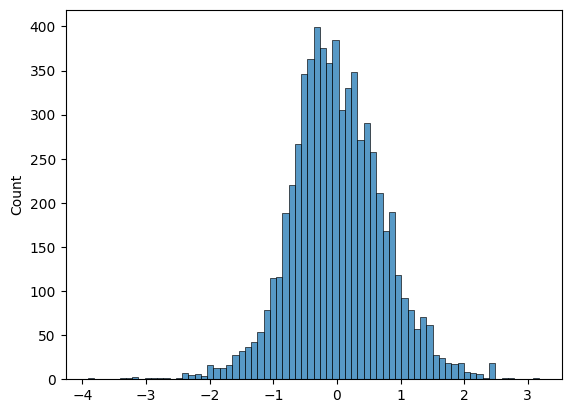

In [252]:
residuals = fitted.resid
sns.histplot(residuals)

C:\Users\bingy\AppData\Local\Temp\ipykernel_30712\1139619017.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, fit=stats.norm, ax=ax1)


((array([-3.70264522, -3.47132216, -3.34402621, ...,  3.34402621,
          3.47132216,  3.70264522]),
  array([-3.90978897, -3.33317759, -3.31722703, ...,  2.60392367,
          2.71180175,  3.1784692 ])),
 (0.7266812594347043, -3.426178671062401e-14, 0.995242243655403))

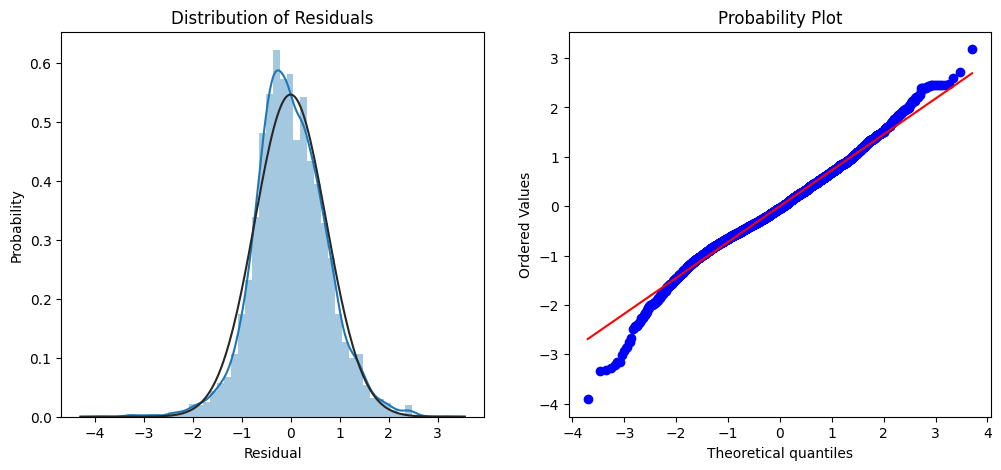

In [263]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.distplot(residuals, fit=stats.norm, ax=ax1)
ax1.set_title('Distribution of Residuals')
ax1.set_xlabel('Residual')
ax1.set_ylabel('Probability')
stats.probplot(residuals.ravel(), plot=ax2)

In [254]:
y = wine['quality']
yhat = fitted.predict()

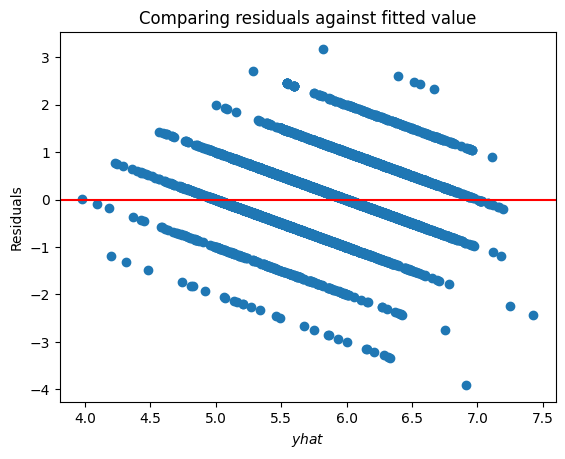

In [255]:
plt.scatter(yhat, residuals)
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.xlabel(r'$yhat$')
plt.ylabel('Residuals')
plt.title("Comparing residuals against fitted value")
plt.show()

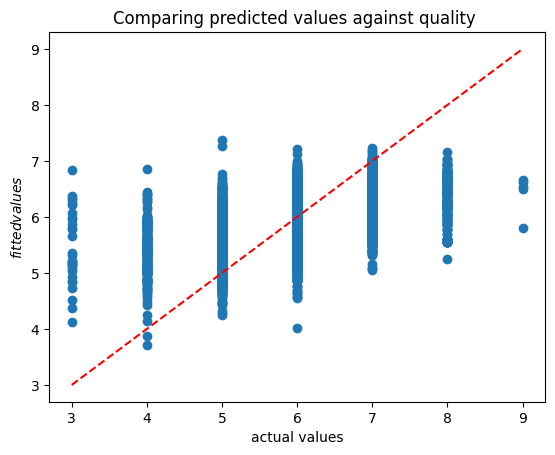

In [201]:
plt.clf()
plt.scatter(y, yhat)
xx = [3, 9]  # Example start and end x-values
yy = [3, 9]  # Example start and end y-values

# Plot the diagonal line
plt.plot(xx, yy, color='red', linestyle='--')  # Adjust color and linestyle as needed

plt.ylabel(r'$fitted values$')
plt.xlabel('actual values')
plt.title("Comparing predicted values against quality ")
plt.show()

(7,)

In [296]:
display(y.value_counts())

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

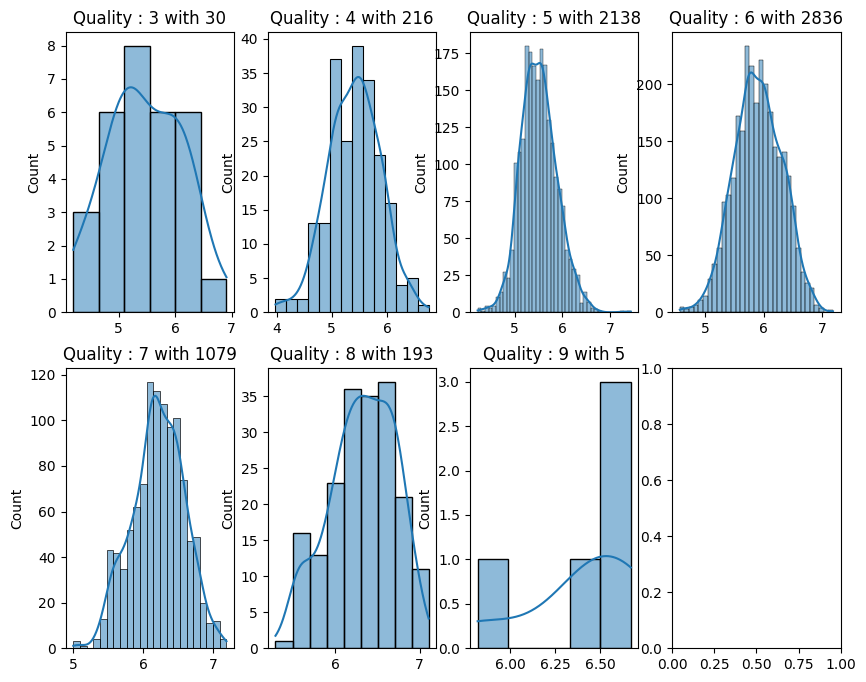

In [303]:
# Setting up the grid of plots
a = min(y)
b = max(y)
cts = y.value_counts()
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 8))
axes = axes.flatten()

for i,qual in enumerate(range(a,b+1)):
    sns.histplot(yhat[y==qual],ax=axes[i], kde=True)  # Adjust kde argument as needed
    c = cts.get(qual,0)
    axes[i].set_title(f'Quality : {qual} with {c}')  # Set titles for each subplot


In [258]:
y = wine['quality']
X = wine.drop('quality', axis=1, inplace=False)

# Scaling the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Adding a column of ones for the intercept term
X = sm.add_constant(X)

# Performing Lasso regression using statsmodels
lasso_model = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=1.0, L1_wt=1.0)

# Printing the summary of the Lasso regression model
print(lasso_model.summary())

NameError: name 'StandardScaler' is not defined

## Communicate Findings

- Interpret your findings in context.
- Create a data visualization that helps explain your results.
- Write a newspaper headline for your findings. Be careful not to overstate, but get creative.

## Reflect

Think of this data exploration as a start towards your data portfolio. Many employers like to see evidence that you can wrangle a dataset, answer an interesting question, and report your findings in an accessible way.

Suppose an interviewer asks you about a time you explored a dataset without a clear idea of what you would find. Craft a short response based on your experience in this notebook. Remember you want to pitch your skills and creativity.

draw multiply diagram all together

white wine -> alcohol and residual sugar

Crossvalidation \
predictions

In [266]:
wine['quality'].astype('category').value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64